# MNIST

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

from torch import nn

In [ ]:
# gpu 되는지 확인
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda")

In [ ]:
# MNIST dataset 다운로드
train_dataset = MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)
print(train_dataset)

100%|██████████| 9912422/9912422 [00:00<00:00, 168054646.61it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 90670429.51it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 178065640.12it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20440481.51it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
# DataLoader 생성

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=128,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=128,
                          shuffle=True)

# Tensor에 대하여

In [ ]:
# Numpy > Tensor

z = torch.empty(5,2)

In [ ]:
a = np.ones((5,2))
# tensor로 변환
b = torch.from_numpy(a)
print(b, b.shape)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], dtype=torch.float64) torch.Size([5, 2])


In [ ]:
# tensor > numpy
numpy_arr = b.numpy()
print(numpy_arr)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


MNIST 데이터셋을 확인

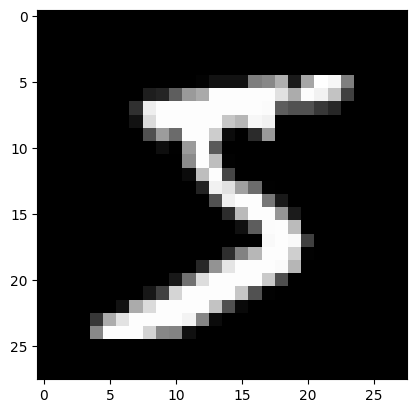

In [ ]:
# 하나의 이미지만 가져오기
img = train_dataset[0][0].numpy()
plt.imshow(img[0], cmap='gray')
plt.show()

모델 만들기(Multi layer perceptron)

In [ ]:
# sequential
mnist_fc_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=28*28*1, out_features=256),
    nn.Sigmoid(),
    nn.Linear(in_features=256, out_features=10),
    nn.Softmax()
)

In [ ]:
# device = "cuda"
# 모델을 device로 전달해야합니다.
# cpu에 만들어짐 gpu로 넘겨서 연산을 하도록 해야합니다.
mnist_fc_model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=256, out_features=10, bias=True)
  (4): Softmax(dim=None)
)

In [ ]:
from torch import optim
import time

def train(model, train_loader):
  epochs = 30
  optimizer = optim.Adam(model.parameters(), lr=0.0001)
  criterion = nn.CrossEntropyLoss()

  start_time = time.time() # 시작시간 체크

  for epoch in range(epochs):
    # model 학습이 가능하도록 모드를 변경
    model.train()
    print(f"epochs:{str(epoch+1)} / {str(epochs)}")

    for samples in train_loader:
      x_t, y_t = samples
      # 데이터를 cuda(gpu)로 보내주자
      x_t, y_t = x_t.to(device), y_t.to(device)
      pred = model(x_t) # predict
      loss = criterion(pred, y_t) # loss 구하기
      optimizer.zero_grad() # optimzer를 사용해서 학습을 시킴
      loss.backward() # 역전파 # 기울기(gradient) 구하기
      optimizer.step() # 기울기 적용
    # 하나의 epoch에 대해서 학습이 끝난 후
    # 모델을 평가상태로 모드 변경
    model.eval()
    correct = 0
    for samples in train_loader:
      xx, yy = samples
      xx, yy = xx.to(device), yy.to(device)
      pred = model(xx) # 모델 predict
      _, predicted = torch.max(pred, 1)
      correct += predicted.eq(yy.data).sum()
    print(f"train_accuracy: {(100. * correct / len(train_loader.dataset)).item()}")

    end_time = time.time() # 끝나는 시간 확인
    지난시간 = end_time - start_time
    분 = int(지난시간 // 60)
    초 = int(지난시간 % 60)

    print(f'학습하는데 걸린 시간: {분}분 {초}초')

In [ ]:
train(mnist_fc_model, train_loader)

epochs:1 / 10
train_accuracy: 65.04499816894531
epochs:2 / 10
train_accuracy: 66.63166809082031
epochs:3 / 10
train_accuracy: 77.74166870117188
epochs:4 / 10
train_accuracy: 81.63333129882812
epochs:5 / 10
train_accuracy: 82.52666473388672
epochs:6 / 10
train_accuracy: 83.02999877929688
epochs:7 / 10
train_accuracy: 85.25666809082031
epochs:8 / 10
train_accuracy: 91.0633316040039
epochs:9 / 10
train_accuracy: 91.56500244140625
epochs:10 / 10
train_accuracy: 91.94667053222656


# 우리가 만든 모델의 복잡도 알아보기

모델의 parameter수로 복잡도 판단  
훈련가능한 parameter.  
훈련가능하지 않은 parameter. 

In [ ]:
def 복잡도계산(model):
  pp = 0
  # 모델에서 parameter를 하나씩 불러온다
  for p in list(model.parameters()):
    nn = 1
    # 각 parameter의 수를 더해준다
    for s in list(p.size()):
      nn = nn*s
    pp += nn
  return pp

In [ ]:
복잡도계산(mnist_fc_model)

203530

# CNN을 이용하여 모델 설계

CNN 합성곱연산을 이용한 모델  
이미지에서 많이 사용됨

In [ ]:
mnist_cnn_model = nn.Sequential(
    # input 1x28x28
    nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    # ===== convolution layer 2개 완성 =====
    nn.Flatten(),
    nn.Linear(in_features=24*24*8, out_features=48),
    nn.Sigmoid(),
    nn.Linear(in_features=48, out_features=10),
    nn.Softmax()
)

In [ ]:
복잡도계산(mnist_cnn_model)

222058

In [ ]:
# gpu에 모델을 넣어줌
mnist_cnn_model.to(device)
# 학습
train(mnist_cnn_model, train_loader)

epochs:1 / 10


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train_accuracy: 65.49333190917969
epochs:2 / 10
train_accuracy: 79.18167114257812
epochs:3 / 10
train_accuracy: 82.53166961669922
epochs:4 / 10
train_accuracy: 83.27166748046875
epochs:5 / 10
train_accuracy: 83.89500427246094
epochs:6 / 10
train_accuracy: 89.75666809082031
epochs:7 / 10
train_accuracy: 91.08499908447266
epochs:8 / 10
train_accuracy: 91.5433349609375
epochs:9 / 10
train_accuracy: 92.12833404541016
epochs:10 / 10
train_accuracy: 92.47833251953125


# Le-Net5 이라는 검증된 네트워크를 만들어보자

In [ ]:
import torch.nn.functional as F

lenet = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=4, stride=1),
    nn.Tanh(),
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.Tanh(),
    nn.Linear(in_features=84, out_features=10),
    nn.Softmax()
)

In [ ]:
복잡도계산(lenet)

44426

In [ ]:
# gpu에다가 모델을 넘겨주기 위함
lenet.to(device)
# 학습을 진행
train(lenet, train_loader)

epochs:1 / 10


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train_accuracy: 80.57167053222656
epochs:2 / 10
train_accuracy: 88.34333801269531
epochs:3 / 10
train_accuracy: 90.25
epochs:4 / 10
train_accuracy: 91.52000427246094
epochs:5 / 10
train_accuracy: 92.52000427246094
epochs:6 / 10
train_accuracy: 93.211669921875
epochs:7 / 10
train_accuracy: 93.86833190917969
epochs:8 / 10
train_accuracy: 94.44667053222656
epochs:9 / 10
train_accuracy: 94.84166717529297
epochs:10 / 10
train_accuracy: 95.28333282470703


In [ ]:
from torchsummary import summary

summary(lenet, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
              Tanh-2            [-1, 6, 24, 24]               0
         AvgPool2d-3            [-1, 6, 12, 12]               0
            Conv2d-4             [-1, 16, 8, 8]           2,416
              Tanh-5             [-1, 16, 8, 8]               0
         AvgPool2d-6             [-1, 16, 4, 4]               0
            Conv2d-7            [-1, 120, 1, 1]          30,840
              Tanh-8            [-1, 120, 1, 1]               0
           Flatten-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             Tanh-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
          Softmax-13                   [-1, 10]               0
Total params: 44,426
Trainable params: 

In [ ]:
summary(mnist_cnn_model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
              ReLU-2            [-1, 4, 26, 26]               0
            Conv2d-3            [-1, 8, 24, 24]             296
              ReLU-4            [-1, 8, 24, 24]               0
           Flatten-5                 [-1, 4608]               0
            Linear-6                   [-1, 48]         221,232
           Sigmoid-7                   [-1, 48]               0
            Linear-8                   [-1, 10]             490
           Softmax-9                   [-1, 10]               0
Total params: 222,058
Trainable params: 222,058
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.15
Params size (MB): 0.85
Estimated Total Size (MB): 1.00
-------------------------------------------

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


# 복잡한 CNN을 만들어보자

In [ ]:
model = nn.Sequential(
    nn.Conv2d(),
    nn.Flatten(),
    nn.Linear,
)

FashionMNIST

In [ ]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms

In [ ]:
fashion_mnist_transforms = transforms.Compose([
    transforms.ToTensor(), # tensor형태로 변환
    transforms.Resize(48) # 48x48 이미지로 변환
])

train_dataset = FashionMNIST('./', transform=fashion_mnist_transforms, train=True, download=True)
test_dataset = FashionMNIST('./', transform=fashion_mnist_transforms, train=False, download=True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size = 256,
                          shuffle = True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size = 256,
                         shuffle = True)

# 모델 만들기  
총 7개의 Convolution layer가 존재하도록 만들것

In [ ]:
from torch import nn
import torch

class SimpleConvNet1(nn.Module):
  def __init__(self):
    # 초기화
    super().__init__() # 부모 클래스 초기화
    # 선언
    self.CNN = nn.Sequential(
        # stage1
        nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=1,padding=1),
        nn.ReLU(True),
        nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,stride=1,padding=1),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # stage2
        nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(True),
        nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # stage3
        nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(True),
        nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(True),
        nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding='same'),
        nn.ReLU(True),
        nn.MaxPool2d(kernel_size=4, stride=4),
    )

    self.FC = nn.Sequential(
        nn.Linear(64*3*3, 256),
        nn.ReLU(True),
        nn.Dropout(p=0.2),
        nn.Linear(256, 10),
        nn.Softmax()
    )

  # forward
  def forward(self, inp):
    cnn_result = self.CNN(inp)
    flatten = torch.flatten(cnn_result, 1)
    fc_result = self.FC(flatten)
    return fc_result

In [ ]:
convnet1 = SimpleConvNet1()

In [ ]:
convnet1.to(device)
summary(convnet1, (1,48,48))
train(convnet1, train_loader)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 48, 48]             160
              ReLU-2           [-1, 16, 48, 48]               0
            Conv2d-3           [-1, 16, 48, 48]           2,320
              ReLU-4           [-1, 16, 48, 48]               0
         MaxPool2d-5           [-1, 16, 24, 24]               0
            Conv2d-6           [-1, 32, 24, 24]           4,640
              ReLU-7           [-1, 32, 24, 24]               0
            Conv2d-8           [-1, 32, 24, 24]           9,248
              ReLU-9           [-1, 32, 24, 24]               0
        MaxPool2d-10           [-1, 32, 12, 12]               0
           Conv2d-11           [-1, 64, 12, 12]          18,496
             ReLU-12           [-1, 64, 12, 12]               0
           Conv2d-13           [-1, 64, 12, 12]          36,928
             ReLU-14           [-1, 64,

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
train(convnet1, train_loader)

epochs:1 / 10


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train_accuracy: 70.73333740234375
학습하는데 걸린 시간: 0분 31초
epochs:2 / 10
train_accuracy: 75.40166473388672
학습하는데 걸린 시간: 1분 4초
epochs:3 / 10
train_accuracy: 78.7066650390625
학습하는데 걸린 시간: 1분 36초
epochs:4 / 10
train_accuracy: 80.15166473388672
학습하는데 걸린 시간: 2분 7초
epochs:5 / 10
train_accuracy: 80.55833435058594
학습하는데 걸린 시간: 2분 39초
epochs:6 / 10
train_accuracy: 81.83333587646484
학습하는데 걸린 시간: 3분 11초
epochs:7 / 10
train_accuracy: 82.90666961669922
학습하는데 걸린 시간: 3분 42초
epochs:8 / 10
train_accuracy: 83.33499908447266
학습하는데 걸린 시간: 4분 13초
epochs:9 / 10
train_accuracy: 83.41166687011719
학습하는데 걸린 시간: 4분 45초
epochs:10 / 10
train_accuracy: 83.89833068847656
학습하는데 걸린 시간: 5분 16초


# test하는 함수

In [ ]:
def test(model, loader):
  with torch.no_grad():
    # 이 안에 있는 것들은 기울기 계산을 안함
    # 모델이 고정됨. 평가하는 용도로 제격
    model.eval() # 모델을 평가모드로 변경
    correct = 0
    for xx, yy in loader:
      # xx: 데이터(이미지)
      # yy: 정답
      data, target = xx.to(device), yy.to(device)
      pred = model(data)
      _, predicted = torch.max(pred, 1)
      correct += predicted.eq(target.data).sum()

    print(f"test accuracy: {(100. * correct / len(loader.dataset)).item()}")

In [ ]:
test(convnet1, test_loader)

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


test accuracy: 82.56999969482422


# MNIST 훈련

# SVHN이라는 데이터셋 학습

In [ ]:
fashion_mnist_transforms = transforms.Compose([
    transforms.ToTensor(), # tensor형태로 변환
    transforms.Resize(48) # 48x48 이미지로 변환
])

train_dataset = MNIST(root='MNIST_data/', train=True, transform=fashion_mnist_transforms, download=True)
test_dataset = MNIST(root='MNIST_data/', train=False, transform=fashion_mnist_transforms, download=True)

In [ ]:
train_loader = DataLoader(dataset = train_dataset,
                         batch_size = 256,
                         shuffle=True)
test_loader = DataLoader(dataset = test_dataset,
                         batch_size = 256,
                         shuffle=True)

In [ ]:
convnet2 = SimpleConvNet1()

In [ ]:
convnet2.to(device)
summary(convnet2, (1,48,48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 48, 48]             160
              ReLU-2           [-1, 16, 48, 48]               0
            Conv2d-3           [-1, 16, 48, 48]           2,320
              ReLU-4           [-1, 16, 48, 48]               0
         MaxPool2d-5           [-1, 16, 24, 24]               0
            Conv2d-6           [-1, 32, 24, 24]           4,640
              ReLU-7           [-1, 32, 24, 24]               0
            Conv2d-8           [-1, 32, 24, 24]           9,248
              ReLU-9           [-1, 32, 24, 24]               0
        MaxPool2d-10           [-1, 32, 12, 12]               0
           Conv2d-11           [-1, 64, 12, 12]          18,496
             ReLU-12           [-1, 64, 12, 12]               0
           Conv2d-13           [-1, 64, 12, 12]          36,928
             ReLU-14           [-1, 64,

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
train(convnet2, train_loader)

epochs:1 / 10


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train_accuracy: 83.3316650390625
학습하는데 걸린 시간: 0분 31초
epochs:2 / 10
train_accuracy: 94.38666534423828
학습하는데 걸린 시간: 1분 4초
epochs:3 / 10
train_accuracy: 96.23333740234375
학습하는데 걸린 시간: 1분 46초
epochs:4 / 10
train_accuracy: 96.84333801269531
학습하는데 걸린 시간: 2분 30초
epochs:5 / 10
train_accuracy: 96.74500274658203
학습하는데 걸린 시간: 3분 12초
epochs:6 / 10
train_accuracy: 97.41333770751953
학습하는데 걸린 시간: 3분 55초
epochs:7 / 10
train_accuracy: 97.63833618164062
학습하는데 걸린 시간: 4분 36초
epochs:8 / 10
train_accuracy: 97.86000061035156
학습하는데 걸린 시간: 5분 15초
epochs:9 / 10
train_accuracy: 97.69000244140625
학습하는데 걸린 시간: 5분 46초
epochs:10 / 10
train_accuracy: 98.1866683959961
학습하는데 걸린 시간: 6분 19초


In [ ]:
import torchvision.datasets as datasets

svhn_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((48,48)),
    transforms.Grayscale()
])

SVHN_train_dataset = datasets.SVHN(root='./', split='train', transform=svhn_transform, download=True)
SVHN_test_dataset = datasets.SVHN(root='./', split='test', transform=svhn_transform, download=True)

sv_train_loader = DataLoader(dataset=SVHN_train_dataset, batch_size=128, shuffle=True)
sv_test_loader = DataLoader(dataset=SVHN_test_dataset, batch_size=128, shuffle=True)

100%|██████████| 182040794/182040794 [00:18<00:00, 9782226.33it/s] 


100%|██████████| 64275384/64275384 [00:11<00:00, 5610276.65it/s] 


In [ ]:
SVHN_train_dataset[0][0].shape

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 48, 48])

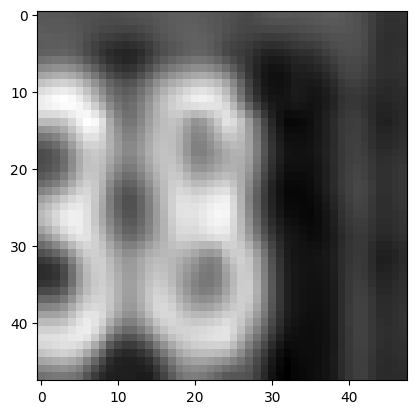

In [ ]:
plt.imshow(SVHN_train_dataset[170][0][0], cmap='gray')
plt.show()

In [ ]:
test(convnet2, sv_test_loader)

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


test accuracy: 11.966041564941406


Transfer Learning

In [ ]:
class SvhnNet(nn.Module):
  def __init__(self, pretrain_model):
    super().__init__()
    self.pretrain = pretrain_model # 학습된 모델을 self.pretrain에 저장
    # 우리가 받은 pretrain_model의 parameter를 고정
    for param in self.pretrain.parameters():
      param.requires_grad = False

    self.add_model = nn.Sequential(
        nn.Linear(in_features=64*3*3, out_features=256),
        nn.ReLU(True),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=256, out_features=10),
        nn.Softmax()
    )

  def forward(self, inp):
    with torch.no_grad(): # 기울기 학습 안하도록 함
      cnn_result = self.pretrain(inp)
    flatten = torch.flatten(cnn_result, 1)
    result = self.add_model(flatten)
    return result

In [ ]:
svhn_net = SvhnNet(convnet2.CNN)

In [ ]:
svhn_net.to(device)
summary(svhn_net, (1,48,48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 48, 48]             160
              ReLU-2           [-1, 16, 48, 48]               0
            Conv2d-3           [-1, 16, 48, 48]           2,320
              ReLU-4           [-1, 16, 48, 48]               0
         MaxPool2d-5           [-1, 16, 24, 24]               0
            Conv2d-6           [-1, 32, 24, 24]           4,640
              ReLU-7           [-1, 32, 24, 24]               0
            Conv2d-8           [-1, 32, 24, 24]           9,248
              ReLU-9           [-1, 32, 24, 24]               0
        MaxPool2d-10           [-1, 32, 12, 12]               0
           Conv2d-11           [-1, 64, 12, 12]          18,496
             ReLU-12           [-1, 64, 12, 12]               0
           Conv2d-13           [-1, 64, 12, 12]          36,928
             ReLU-14           [-1, 64,

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
SVHN_train_dataset

Dataset SVHN
    Number of datapoints: 73257
    Root location: ./
    Split: train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(48, 48), interpolation=bilinear, max_size=None, antialias=warn)
               Grayscale(num_output_channels=1)
           )

In [ ]:
# 데이터셋에서 일부만 가져오기
from torch.utils.data import random_split
svhn_train_1, svhn_train_2 = random_split(SVHN_train_dataset, [1000, 72257])
sv_train_loader2 = DataLoader(dataset=svhn_train_1,
                              batch_size=128,
                              shuffle=True)

In [ ]:
train(svhn_net, sv_train_loader)

epochs:1 / 10
train_accuracy: 44.93768310546875
학습하는데 걸린 시간: 1분 9초
epochs:2 / 10
train_accuracy: 52.521942138671875
학습하는데 걸린 시간: 2분 19초
epochs:3 / 10
train_accuracy: 55.111454010009766
학습하는데 걸린 시간: 3분 31초
epochs:4 / 10
train_accuracy: 59.904170989990234
학습하는데 걸린 시간: 4분 42초
epochs:5 / 10
train_accuracy: 63.1489143371582
학습하는데 걸린 시간: 5분 54초
epochs:6 / 10
train_accuracy: 62.417240142822266
학습하는데 걸린 시간: 7분 5초
epochs:7 / 10
train_accuracy: 65.5937271118164
학습하는데 걸린 시간: 8분 16초
epochs:8 / 10
train_accuracy: 65.77391815185547
학습하는데 걸린 시간: 9분 28초
epochs:9 / 10
train_accuracy: 66.3963851928711
학습하는데 걸린 시간: 10분 40초
epochs:10 / 10
train_accuracy: 65.97184753417969
학습하는데 걸린 시간: 11분 52초


# 학습된 ResNet 18을 이용해서 매우 적은 숫자의 FashionMNIST를 학습시키자

FashionMNIST 데이터셋을 불러오자

In [ ]:
fashion_mnist_transforms = transforms.Compose([
    transforms.ToTensor(), # tensor형태로 변환
    transforms.Resize(224) # 224x224 이미지로 변환
])

train_dataset = FashionMNIST('./', transform=fashion_mnist_transforms, train=True, download=True)
test_dataset = FashionMNIST('./', transform=fashion_mnist_transforms, train=False, download=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size = 256,
                         shuffle = True)

In [ ]:
# random_split

train_dataset1, train_dataset2 = random_split(train_dataset, [1000, 59000])
train_loader2 = DataLoader(dataset = train_dataset1,
                           batch_size = 128,
                           shuffle = True)

# ResNet18 Transfer Learning

## 학습된 ResNet18을 불러오자

In [ ]:
from torchvision import models
resnet18_pretrained = models.resnet18(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Transfer Learning을 진행하기위해 할 것  
1. 뒤쪽에 FC레이어를 변경
2. 앞쪽에 CNN부분의 학습을 멈춤 (freeze)



In [ ]:
# freeze
for param in resnet18_pretrained.parameters():
  param.requires_grad = False
# 뒤쪽에 FC 레이어를 변경
resnet18_pretrained.fc = nn.Sequential(
    nn.Linear(512,10),
    nn.Softmax()
)
resnet18_pretrained.conv1 = nn.Conv2d(in_channels=1, out_channels=64,
                                      kernel_size=(7,7),
                                      stride=(2,2),
                                      padding=(3,3),
                                      bias=False)
resnet18_pretrained.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
summary(resnet18_pretrained, (1,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,136
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
train(resnet18_pretrained, train_loader2)

epochs:1 / 30
train_accuracy: 14.0
학습하는데 걸린 시간: 0분 0초
epochs:2 / 30
train_accuracy: 14.0
학습하는데 걸린 시간: 0분 0초
epochs:3 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 1초
epochs:4 / 30
train_accuracy: 16.0
학습하는데 걸린 시간: 0분 1초
epochs:5 / 30
train_accuracy: 16.0
학습하는데 걸린 시간: 0분 1초
epochs:6 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 2초
epochs:7 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 2초
epochs:8 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 2초
epochs:9 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 3초
epochs:10 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 3초
epochs:11 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 3초
epochs:12 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 4초
epochs:13 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 4초
epochs:14 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 4초
epochs:15 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 5초
epochs:16 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 5초
epochs:17 / 30
train_accuracy: 15.0
학습하는데 걸린 시간: 0분 5초
epochs:18 / 30
train_accuracy: 14.0
학습하는데 걸린 시간: 0분 6초
epochs:19 / 30
trai

# Fine Tuning

In [ ]:
resnet18_pretrained = models.resnet18(pretrained=True)
resnet18_pretrained.to(device)

# freeze
# for param in resnet18_pretrained.parameters():
#   param.requires_grad = False
# 뒤쪽에 FC 레이어를 변경
resnet18_pretrained.fc = nn.Sequential(
    nn.Linear(512,10),
    nn.Softmax()
)
resnet18_pretrained.conv1 = nn.Conv2d(in_channels=1, out_channels=64,
                                      kernel_size=(7,7),
                                      stride=(2,2),
                                      padding=(3,3),
                                      bias=False)
resnet18_pretrained.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
train(resnet18_pretrained, train_loader2)

epochs:1 / 30
train_accuracy: 18.30000114440918
학습하는데 걸린 시간: 0분 3초
epochs:2 / 30
train_accuracy: 18.200000762939453
학습하는데 걸린 시간: 0분 7초
epochs:3 / 30
train_accuracy: 31.900001525878906
학습하는데 걸린 시간: 0분 11초
epochs:4 / 30
train_accuracy: 46.80000305175781
학습하는데 걸린 시간: 0분 14초
epochs:5 / 30
train_accuracy: 52.10000228881836
학습하는데 걸린 시간: 0분 18초
epochs:6 / 30
train_accuracy: 57.80000305175781
학습하는데 걸린 시간: 0분 22초
epochs:7 / 30
train_accuracy: 77.80000305175781
학습하는데 걸린 시간: 0분 26초
epochs:8 / 30
train_accuracy: 93.10000610351562
학습하는데 걸린 시간: 0분 29초
epochs:9 / 30
train_accuracy: 97.4000015258789
학습하는데 걸린 시간: 0분 33초
epochs:10 / 30
train_accuracy: 98.80000305175781
학습하는데 걸린 시간: 0분 37초
epochs:11 / 30
train_accuracy: 99.30000305175781
학습하는데 걸린 시간: 0분 40초
epochs:12 / 30
train_accuracy: 99.4000015258789
학습하는데 걸린 시간: 0분 44초
epochs:13 / 30
train_accuracy: 99.60000610351562
학습하는데 걸린 시간: 0분 48초
epochs:14 / 30
train_accuracy: 99.70000457763672
학습하는데 걸린 시간: 0분 51초
epochs:15 / 30
train_accuracy: 99.70000457763

In [ ]:
test(resnet18_pretrained, test_loader)

test accuracy: 84.93000030517578


In [ ]:
summary(resnet18_pretrained, input_size=(1,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,136
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
